In [6]:
import numpy as np
import pandas as pd
import sys
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
sys.path.insert(0, 'C:/Users/Antoine/github/MEG_pareidolia/python_scripts/Functions')
import MEG_pareidolia_utils
from MEG_pareidolia_utils import *





In [51]:
epochs.metadata

,FD,FD_class,n_obj,n_obj_class,parei,contrast,earlyVSlate,spont_par
1,1.275,0,0.0,0,0,0.0,0,0
5,1.200,0,1.0,1,1,1.0,2,2
9,1.500,1,1.0,1,1,1.0,2,1
12,1.125,0,0.0,0,0,1.0,0,0
15,1.875,2,0.0,0,0,1.0,0,0
19,1.650,1,2.0,2,1,0.0,2,1
23,1.575,1,1.0,1,1,0.0,1,1
27,1.350,1,2.0,2,1,0.0,2,1
30,1.275,0,0.0,0,0,1.0,0,0
33,1.425,1,0.0,0,0,1.0,0,0


In [7]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import h5py

def get_hilbert_data(subj, run):
    # Load Hilbert data for a given subject and run
    # You need to define how hilbert_path is set
    hilbert_name, hilbert_path = get_pareidolia_bids(FOLDERPATH, subj, 'pareidolia', run, stage = 'Hilbert_RT_wide', cond=None)
    with h5py.File(hilbert_path, "r") as f:
        return f["hilbert_data"][:]

def plot_time_frequency(data, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(np.nanmean(data, axis=0), aspect='auto', origin='lower', 
               extent=[epochs.times[0], epochs.times[-1], 1, data.shape[0]])
    plt.colorbar(label='Power')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency band')
    plt.title(title)
    plt.show()

In [3]:
MEG_atlas = {
        "CL": list(range(0, 24)),
        "FL": list(range(24, 57)),
        "OL": list(range(57, 76)),
        "PL": list(range(76, 97)),
        "TL": list(range(97, 131)),
        "CR": list(range(131, 153)),
        "FR": list(range(153, 186)),
        "OR": list(range(186, 204)),
        "PR": list(range(204, 226)),
        "TR": list(range(226, 259)),
        "CZ": list(range(259, 263)),
        "Fz": list(range(263, 266)),
        "OZ": list(range(266, 269)),
        "PZ": list(range(269, 270)),
    }

In [31]:
import mne

# 'epochs' is your MNE Epochs object that contains all the epochs.
import mne

# 'epochs' is your MNE Epochs object that contains all the epochs.
# This will give you a boolean array where 'True' corresponds to epochs with 'RT_par' event_id.
selection = epochs.events[:, 2] == epochs.event_id['RT_par']

# This will give you the indices of those epochs where the event_id is 'RT_par'.
rt_par_indices = [i for i, sel in enumerate(selection) if sel]
len(rt_par_indices)

42

In [22]:
epo_name, epo_path = get_pareidolia_bids(FOLDERPATH, '11', 'pareidolia', '1', stage='epo_RT_large', cond=None)
epochs = mne.read_epochs(epo_path)

C:\Users\Antoine\AppData\Local\Temp\ipykernel_18400\743433358.py:2: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_large.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_large.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
51 matching events found
No baseline correction applied
0 projection items activated


In [32]:
epochs

Number of events,52
Events,False_RT: 3RT_nopar: 12RT_par: 37
Time range,-1.000 – 2.500 s
Baseline,-1.000 – -0.500 s


In [8]:
epochs
par_bool = epochs.events[:, 2] == epochs.event_id['RT_nopar']
par_bool
par_indices = [i for i, sel in enumerate(par_bool) if sel]
len(par_indices)

7

In [13]:
par_bool = epochs.events[:, 2] == epochs.event_id['RT_par']
len(par_bool)

52

## tf-maps early vs late

In [4]:
import numpy as np
import mne  # Assuming mne is already imported as it's used in the script

# Given MEG atlas with regions
MEG_atlas = {
    "CL": list(range(0, 24)),
    "FL": list(range(24, 57)),
    "OL": list(range(57, 76)),
    "PL": list(range(76, 97)),
    "TL": list(range(97, 131)),
    "CR": list(range(131, 153)),
    "FR": list(range(153, 186)),
    "OR": list(range(186, 204)),
    "PR": list(range(204, 226)),
    "TR": list(range(226, 259)),
    "CZ": list(range(259, 263)),
    "Fz": list(range(263, 266)),
    "OZ": list(range(266, 269)),
    "PZ": list(range(269, 270)),
}

regions = ['CL', 'CR', 'CZ']

subj_list = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']
run_list = ['1', '2', '3', '4', '5', '6']
all_hilbert_early = []
all_hilbert_late = []
for subj in subj_list:
    # Create empty 3D array to store hilbert data
    early_hilbert_ = []
    late_hilbert_ = []
    for run in run_list:
        try:
            epo_name, epo_path = get_pareidolia_bids(FOLDERPATH, subj, 'pareidolia', run, stage='epo_RT_wide', cond=None)
            epochs = mne.read_epochs(epo_path)
            hilbert_data = get_hilbert_data(subj, run)
            epo_name, epo_path = get_pareidolia_bids(FOLDERPATH, subj, 'pareidolia', run, stage='epo_RT_early3s', cond=None)
            epochs_earlyVSlate = mne.read_epochs(epo_path)


            # Selecting trials based on earlyVSlate condition
            early_bool = epochs_earlyVSlate.metadata['earlyVSlate'] == 1
            early_indices = [i for i, sel in enumerate(early_bool) if sel]
            late_bool = epochs_earlyVSlate['earlyVSlate'] == 2
            late_indices = [i for i, sel in enumerate(late_bool) if sel]

            hilbert_early = hilbert_data[:, 0, early_indices, :, :]
            hilbert_late = hilbert_data[:, 0, late_indices, :, :]
            
            # Keep only selected regions
            hilbert_early = hilbert_early[:, :, MEG_atlas['FL'] + MEG_atlas['FR'] + MEG_atlas['Fz'], :]
            hilbert_late = hilbert_late[:, :, MEG_atlas['FL']+ MEG_atlas['FR'] + MEG_atlas['Fz'], :]

            # Average across channels
            hilbert_early = np.mean(hilbert_early, axis=2)
            hilbert_late = np.mean(hilbert_late, axis=2)

            if early_hilbert_ == []:
                early_hilbert_ = hilbert_early
                late_hilbert_ = hilbert_late
            else:
                early_hilbert_ = np.concatenate((early_hilbert_, hilbert_early), axis=1)
                late_hilbert_ = np.concatenate((late_hilbert_, hilbert_late), axis=1)

        except (FileNotFoundError, KeyError):
            print(f'File not found for subj {subj} run {run}')
            continue
    
    # Convert to array and append to list
    early_hilbert_ = np.array(early_hilbert_)
    late_hilbert_ = np.array(late_hilbert_)

    all_hilbert_early.append(early_hilbert_)
    all_hilbert_late.append(late_hilbert_)

# all_hilbert_early_occi and all_hilbert_late_occi now contain the hilbert data for early and late trials respectively



Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_6980\67658536.py:35: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_early3s.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_6980\67658536.py:38: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_early3s.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00 run 1
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_6980\67658536.py:35: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_early3s.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_6980\67658536.py:38: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_early3s.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00 run 2
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_6980\67658536.py:35: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_early3s.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_6980\67658536.py:38: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_early3s.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00 run 3
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_6980\67658536.py:35: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_early3s.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_6980\67658536.py:38: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_early3s.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00 run 4
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_6980\67658536.py:35: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


KeyboardInterrupt: 

## TF-maps pareidolia

In [4]:
import numpy as np
import mne  # Assuming mne is already imported as it's used in the script

# Given MEG atlas with regions
MEG_atlas = {
    "CL": list(range(0, 24)),
    "FL": list(range(24, 57)),
    "OL": list(range(57, 76)),
    "PL": list(range(76, 97)),
    "TL": list(range(97, 131)),
    "CR": list(range(131, 153)),
    "FR": list(range(153, 186)),
    "OR": list(range(186, 204)),
    "PR": list(range(204, 226)),
    "TR": list(range(226, 259)),
    "CZ": list(range(259, 263)),
    "Fz": list(range(263, 266)),
    "OZ": list(range(266, 269)),
    "PZ": list(range(269, 270)),
}

# Regions to extract
regions = ['OL', 'OR', 'OZ', 'CL', 'CR', 'CZ', 'TR', 'PL', 'PR']

# Subject and run lists
subj_list = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']
run_list = ['1', '2', '3', '4', '5', '6']

# Initialize dictionaries to store hilbert data for each region
all_hilbert_par = {region: [] for region in regions}
all_hilbert_nopar = {region: [] for region in regions}

for subj in subj_list:
    for region in regions:
        # Initialize empty lists to store hilbert data for the region
        par_hilbert_ = None
        nopar_hilbert_ = None
        for run in run_list:
            try:
                # Assuming get_pareidolia_bids and get_hilbert_data are predefined functions
                epo_name, epo_path = get_pareidolia_bids(FOLDERPATH, subj, 'pareidolia', run, stage='epo_RT_wide', cond=None)
                epochs = mne.read_epochs(epo_path)
                hilbert_data = get_hilbert_data(subj, run)

                # Get pareidolic and non-pareidolic trial indices
                par_bool = epochs.events[:, 2] == epochs.event_id['RT_par']
                par_indices = np.where(par_bool)[0]
                nopar_bool = epochs.events[:, 2] == epochs.event_id['RT_nopar']
                nopar_indices = np.where(nopar_bool)[0]

                # Select data for the current region
                region_indices = MEG_atlas[region]
                hilbert_par = hilbert_data[:, :, par_indices, :][:, :, :, region_indices]
                hilbert_nopar = hilbert_data[:, :, nopar_indices, :][:, :, :, region_indices]

                # Average across channels within the region
                hilbert_par_mean = np.mean(hilbert_par, axis=3)
                hilbert_nopar_mean = np.mean(hilbert_nopar, axis=3)

                # Append data across runs
                if par_hilbert_ is None:
                    par_hilbert_ = hilbert_par_mean
                else:
                    par_hilbert_ = np.concatenate((par_hilbert_, hilbert_par_mean), axis=2)
                
                if nopar_hilbert_ is None:
                    nopar_hilbert_ = hilbert_nopar_mean
                else:
                    nopar_hilbert_ = np.concatenate((nopar_hilbert_, hilbert_nopar_mean), axis=2)

            except (FileNotFoundError, KeyError) as e:
                print(f'File not found for subj {subj}, region {region}, run {run}: {e}')
                continue

        # Append the averaged data across runs to the lists for all subjects
        if par_hilbert_ is not None:
            all_hilbert_par[region].append(par_hilbert_)
        if nopar_hilbert_ is not None:
            all_hilbert_nopar[region].append(nopar_hilbert_)

# At this point, all_hilbert_par and all_hilbert_nopar dictionaries contain the hilbert data for each region, for pareidolic and non-pareidolic trials respectively.


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00, region OL, run 6: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00, region OR, run 6: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00, region OZ, run 6: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00, region CL, run 6: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00, region CR, run 6: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00, region CZ, run 6: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00, region TR, run 6: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00, region PL, run 6: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 00, region PR, run 6: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 02, region OL, run 4: 'RT_par'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 02, region OR, run 4: 'RT_par'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 02, region OZ, run 4: 'RT_par'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 02, region CL, run 4: 'RT_par'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 02, region CR, run 4: 'RT_par'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 02, region CZ, run 4: 'RT_par'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 02, region TR, run 4: 'RT_par'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 02, region PL, run 4: 'RT_par'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 02, region PR, run 4: 'RT_par'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region OL, run 2: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region OL, run 3: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region OL, run 6: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region OR, run 2: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region OR, run 3: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region OR, run 6: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region OZ, run 2: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region OZ, run 3: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region OZ, run 6: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region CL, run 2: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region CL, run 3: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region CL, run 6: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region CR, run 2: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region CR, run 3: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region CR, run 6: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region CZ, run 2: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region CZ, run 3: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region CZ, run 6: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region TR, run 2: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region TR, run 3: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region TR, run 6: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region PL, run 2: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region PL, run 3: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region PL, run 6: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region PR, run 2: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region PR, run 3: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09, region PR, run 6: 'RT_nopar'
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 11, region OL, run 4: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 11, region OR, run 4: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 11, region OZ, run 4: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 11, region CL, run 4: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 11, region CR, run 4: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 11, region CZ, run 4: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 11, region TR, run 4: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 11, region PL, run 4: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 11, region PR, run 4: File does not exist: D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\118732310.py:42: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated


In [89]:
par_hilbert_

[]

In [44]:
regions = ['CL', 'CR', 'CZ']

subj_list = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']
run_list = ['1', '2', '3', '4', '5', '6']
all_hilbert_par_occi = []
all_hilbert_nopar_occi = []
for subj in subj_list:
    # creatre empty 3D array to store hilbert data
    par_hilbert_ = []
    nopar_hilbert_ = []
    for run in run_list:
        try:
            epo_name, epo_path = get_pareidolia_bids(FOLDERPATH, subj, 'pareidolia', run, stage='epo_RT_wide', cond=None)
            epochs = mne.read_epochs(epo_path)
            hilbert_data = get_hilbert_data(subj, run)

            par_bool = epochs.events[:, 2] == epochs.event_id['RT_par']
            par_indices = [i for i, sel in enumerate(par_bool) if sel]
            nopar_bool = epochs.events[:, 2] == epochs.event_id['RT_nopar']
            nopar_indices = [i for i, sel in enumerate(nopar_bool) if sel]
            print('Par indices', par_indices)
            print('No par indices', nopar_indices)
            hilbert_par = hilbert_data[:, 0, par_indices, :, :]
            hilbert_nopar = hilbert_data[:, 0, nopar_indices, :, :]
            # keep only selected regions
            hilbert_par = hilbert_par[:, :, MEG_atlas['OL'] + MEG_atlas['OR'], :]
            hilbert_nopar = hilbert_nopar[:, :, MEG_atlas['OL']+ MEG_atlas['OR'], :]
            # average across channels
            hilbert_par = np.mean(hilbert_par, axis=2)
            hilbert_nopar = np.mean(hilbert_nopar, axis=2)
            print('hilbert_par shape', hilbert_par.shape)
            print('hilbert_nopar shape', hilbert_nopar.shape)
            if par_hilbert_ == []:
                par_hilbert_ = hilbert_par
                nopar_hilbert_ = hilbert_nopar
            # else append on second axis
            else:
                par_hilbert_ = np.concatenate((par_hilbert_, hilbert_par), axis=1)
                nopar_hilbert_ = np.concatenate((nopar_hilbert_, hilbert_nopar), axis=1)
            print('2', par_hilbert_.shape)
            print('2', nopar_hilbert_.shape)
        except (FileNotFoundError, KeyError):
            print(f'File not found for subj {subj} run {run}')
            continue
    # average across trials
    par_hilbert_ = np.array(par_hilbert_)
    nopar_hilbert_ = np.array(nopar_hilbert_)
    print(par_hilbert_.shape)
    print(nopar_hilbert_.shape)
    #avg_hilbert_par = np.mean(np.abs(hilbert_par), axis=1)
    #avg_hilbert_nopar = np.mean(np.abs(hilbert_nopar), axis=1)

    all_hilbert_par_occi.append(par_hilbert_)
    all_hilbert_nopar_occi.append(nopar_hilbert_)



Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [4, 5, 6, 7, 8, 9, 11, 13, 14, 16, 18, 19, 20, 22, 24, 25, 26, 28, 29, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [0, 1, 2, 12, 15, 17, 23, 27, 30, 33, 41, 43]
hilbert_par shape (8, 37, 3601)
hilbert_nopar shape (8, 12, 3601)
2 (8, 37, 3601)
2 (8, 12, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 21, 22, 23, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50]
No par indices [3, 16, 24, 26, 31, 43, 47, 51]
hilbert_par shape (8, 40, 3601)
hilbert_nopar shape (8, 8, 3601)
2 (8, 77, 3601)
2 (8, 20, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 31, 32, 34, 35, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51]
No par indices [16, 22, 26, 29, 30, 33, 38, 43, 50]
hilbert_par shape (8, 42, 3601)
hilbert_nopar shape (8, 9, 3601)
2 (8, 119, 3601)
2 (8, 29, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 39, 40, 41, 45, 46, 48, 49, 50]
No par indices [13, 24, 35, 36, 38, 44, 51]
hilbert_par shape (8, 41, 3601)
hilbert_nopar shape (8, 7, 3601)
2 (8, 160, 3601)
2 (8, 36, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 4, 5, 6, 7, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [3, 9, 11, 31, 33, 34, 38, 39]
hilbert_par shape (8, 41, 3601)
hilbert_nopar shape (8, 8, 3601)
2 (8, 201, 3601)
2 (8, 44, 3601)
File not found for subj 00 run 6
(8, 201, 3601)
(8, 44, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [1, 2, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 45, 46, 47, 48, 49, 50, 51]
No par indices [3, 6, 7, 20, 23, 41, 43, 44]
hilbert_par shape (8, 43, 3601)
hilbert_nopar shape (8, 8, 3601)
2 (8, 43, 3601)
2 (8, 8, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50]
No par indices [0, 13, 26, 27, 28, 29, 31, 49, 51]
hilbert_par shape (8, 42, 3601)
hilbert_nopar shape (8, 9, 3601)
2 (8, 85, 3601)
2 (8, 17, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 4, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 41, 42, 46, 48, 49, 50, 51]
No par indices [2, 3, 7, 11, 18, 19, 39, 44, 47]
hilbert_par shape (8, 36, 3601)
hilbert_nopar shape (8, 9, 3601)
2 (8, 121, 3601)
2 (8, 26, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 2, 3, 4, 5, 6, 9, 11, 14, 17, 18, 20, 21, 22, 23, 25, 26, 27, 29, 30, 31, 32, 34, 35, 38, 44, 46, 47, 49, 50]
No par indices [1, 7, 8, 10, 12, 15, 16, 19, 28, 33, 36, 39, 40, 41, 42, 43, 45, 48, 51]
hilbert_par shape (8, 30, 3601)
hilbert_nopar shape (8, 19, 3601)
2 (8, 151, 3601)
2 (8, 45, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 2, 4, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 36, 38, 41, 42, 43, 45, 46, 49, 50, 51]
No par indices [1, 3, 5, 6, 10, 19, 20, 21, 25, 27, 39, 40, 44, 47, 48]
hilbert_par shape (8, 35, 3601)
hilbert_nopar shape (8, 15, 3601)
2 (8, 186, 3601)
2 (8, 60, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 2, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 48, 50, 51]
No par indices [1, 3, 4, 9, 16, 29, 30, 33, 39, 41]
hilbert_par shape (8, 40, 3601)
hilbert_nopar shape (8, 10, 3601)
2 (8, 226, 3601)
2 (8, 70, 3601)
(8, 226, 3601)
(8, 70, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [14, 28, 51]
No par indices [0, 3, 9, 15, 17, 18, 25, 27, 33, 38, 39, 43, 44, 45, 46, 47, 48, 49, 50]
hilbert_par shape (8, 3, 3601)
hilbert_nopar shape (8, 19, 3601)
2 (8, 3, 3601)
2 (8, 19, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [12, 23, 37]
No par indices [4, 8, 9, 10, 13, 19, 21, 31, 34, 36, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
hilbert_par shape (8, 3, 3601)
hilbert_nopar shape (8, 21, 3601)
2 (8, 6, 3601)
2 (8, 40, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [17, 19, 38, 39]
No par indices [6, 12, 18, 31, 33, 34, 37, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
hilbert_par shape (8, 4, 3601)
hilbert_nopar shape (8, 17, 3601)
2 (8, 10, 3601)
2 (8, 57, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 02 run 4
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 2, 5, 6, 7, 9, 12, 13, 14, 15, 17, 18, 19, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 35, 36, 38, 40, 41, 42, 43, 44, 46, 47, 49]
No par indices [1, 3, 4, 8, 10, 11, 16, 20, 21, 25, 27, 34, 37, 39, 45, 50, 51]
hilbert_par shape (8, 34, 3601)
hilbert_nopar shape (8, 17, 3601)
2 (8, 44, 3601)
2 (8, 74, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 5, 6, 7, 8, 11, 13, 14, 15, 16, 18, 20, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 36, 37, 38, 40, 42, 44, 45, 47, 48, 50, 51]
No par indices [4, 9, 10, 12, 17, 19, 21, 22, 28, 29, 35, 39, 41, 43, 46, 49]
hilbert_par shape (8, 36, 3601)
hilbert_nopar shape (8, 16, 3601)
2 (8, 80, 3601)
2 (8, 90, 3601)
(8, 80, 3601)
(8, 90, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [28]
hilbert_par shape (8, 47, 3601)
hilbert_nopar shape (8, 1, 3601)
2 (8, 47, 3601)
2 (8, 1, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51]
No par indices [23, 49]
hilbert_par shape (8, 49, 3601)
hilbert_nopar shape (8, 2, 3601)
2 (8, 96, 3601)
2 (8, 3, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50]
No par indices [51]
hilbert_par shape (8, 44, 3601)
hilbert_nopar shape (8, 1, 3601)
2 (8, 140, 3601)
2 (8, 4, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51]
No par indices [50]
hilbert_par shape (8, 47, 3601)
hilbert_nopar shape (8, 1, 3601)
2 (8, 187, 3601)
2 (8, 5, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51]
No par indices [35]
hilbert_par shape (8, 47, 3601)
hilbert_nopar shape (8, 1, 3601)
2 (8, 234, 3601)
2 (8, 6, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 51]
No par indices [4, 20, 42, 50]
hilbert_par shape (8, 44, 3601)
hilbert_nopar shape (8, 4, 3601)
2 (8, 278, 3601)
2 (8, 10, 3601)
(8, 278, 3601)
(8, 10, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Par indices [27, 30, 31, 34, 35, 36, 37, 38, 40, 41]
No par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 32, 33, 39, 42, 43, 44]
hilbert_par shape (8, 10, 3601)
hilbert_nopar shape (8, 35, 3601)
2 (8, 10, 3601)
2 (8, 35, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [4, 5, 6, 12, 13, 14, 19, 23, 27, 30, 35, 37, 39, 48, 50, 51]
No par indices [0, 1, 2, 3, 7, 8, 9, 10, 11, 15, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 31, 32, 33, 34, 36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49]
hilbert_par shape (8, 16, 3601)
hilbert_nopar shape (8, 36, 3601)
2 (8, 26, 3601)
2 (8, 71, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 2, 3, 7, 8, 9, 11, 14, 16, 19, 21, 24, 28, 29, 30, 32, 33, 37, 40, 41, 42, 43, 44, 45, 47, 50]
No par indices [1, 4, 5, 6, 10, 12, 13, 15, 17, 18, 20, 22, 23, 25, 26, 27, 31, 34, 35, 36, 38, 39, 46, 48, 49, 51]
hilbert_par shape (8, 26, 3601)
hilbert_nopar shape (8, 26, 3601)
2 (8, 52, 3601)
2 (8, 97, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 6, 7, 8, 11, 14, 18, 19, 30, 35, 36, 38, 39, 41, 42, 44, 45, 46, 49]
No par indices [1, 2, 3, 4, 5, 9, 10, 12, 13, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 37, 40, 43, 47, 48, 50, 51]
hilbert_par shape (8, 19, 3601)
hilbert_nopar shape (8, 33, 3601)
2 (8, 71, 3601)
2 (8, 130, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 5, 7, 11, 22, 30, 31, 34, 35, 37, 38, 43, 45, 46, 47, 49, 50, 51]
No par indices [1, 2, 3, 4, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 32, 33, 36, 39, 40, 41, 42, 44, 48]
hilbert_par shape (8, 18, 3601)
hilbert_nopar shape (8, 34, 3601)
2 (8, 89, 3601)
2 (8, 164, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [1, 5, 7, 8, 21, 24, 29, 31, 33, 37, 38, 50]
No par indices [0, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 30, 32, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51]
hilbert_par shape (8, 12, 3601)
hilbert_nopar shape (8, 40, 3601)
2 (8, 101, 3601)
2 (8, 204, 3601)
(8, 101, 3601)
(8, 204, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 45, 46, 47, 48, 49, 51]
No par indices [0, 37, 41, 44, 50]
hilbert_par shape (8, 47, 3601)
hilbert_nopar shape (8, 5, 3601)
2 (8, 47, 3601)
2 (8, 5, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51]
No par indices [8, 17, 47]
hilbert_par shape (8, 49, 3601)
hilbert_nopar shape (8, 3, 3601)
2 (8, 96, 3601)
2 (8, 8, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [7, 25, 40]
hilbert_par shape (8, 48, 3601)
hilbert_nopar shape (8, 3, 3601)
2 (8, 144, 3601)
2 (8, 11, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 51]
No par indices [25, 49]
hilbert_par shape (8, 49, 3601)
hilbert_nopar shape (8, 2, 3601)
2 (8, 193, 3601)
2 (8, 13, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [20]
hilbert_par shape (8, 51, 3601)
hilbert_nopar shape (8, 1, 3601)
2 (8, 244, 3601)
2 (8, 14, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
No par indices [1, 36]
hilbert_par shape (8, 44, 3601)
hilbert_nopar shape (8, 2, 3601)
2 (8, 288, 3601)
2 (8, 16, 3601)
(8, 288, 3601)
(8, 16, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 3, 4, 5, 8, 11, 14, 20, 21, 22, 23, 24, 26, 28, 33, 34, 35, 38, 41, 45, 48, 49, 50, 51]
No par indices [1, 2, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 25, 27, 29, 30, 31, 32, 36, 37, 39, 40, 42, 43, 44, 46, 47]
hilbert_par shape (8, 24, 3601)
hilbert_nopar shape (8, 28, 3601)
2 (8, 24, 3601)
2 (8, 28, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 4, 5, 8, 9, 16, 17, 20, 27, 29, 36, 39, 41, 46, 51]
No par indices [1, 2, 3, 6, 7, 10, 11, 12, 13, 14, 15, 18, 19, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35, 37, 38, 40, 42, 43, 44, 45, 47, 48, 49, 50]
hilbert_par shape (8, 15, 3601)
hilbert_nopar shape (8, 37, 3601)
2 (8, 39, 3601)
2 (8, 65, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 9, 13, 15, 20, 22, 30, 32, 36, 39, 47, 48, 51]
No par indices [4, 5, 6, 7, 8, 10, 11, 12, 14, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27, 28, 31, 33, 34, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 49, 50]
hilbert_par shape (8, 16, 3601)
hilbert_nopar shape (8, 35, 3601)
2 (8, 55, 3601)
2 (8, 100, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 5, 10, 13, 21, 23, 32, 35, 45]
No par indices [4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51]
hilbert_par shape (8, 12, 3601)
hilbert_nopar shape (8, 40, 3601)
2 (8, 67, 3601)
2 (8, 140, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [4, 12, 13, 14, 16, 20, 24, 33, 34, 35, 42, 43, 44, 46, 50]
No par indices [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 36, 37, 38, 39, 40, 41, 45, 48, 49, 51]
hilbert_par shape (8, 15, 3601)
hilbert_nopar shape (8, 36, 3601)
2 (8, 82, 3601)
2 (8, 176, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 18, 24, 26, 27, 31, 37, 38, 39, 46, 48, 50]
No par indices [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 28, 29, 30, 32, 33, 34, 35, 36, 40, 41, 42, 43, 44, 45, 47, 49, 51]
hilbert_par shape (8, 12, 3601)
hilbert_nopar shape (8, 40, 3601)
2 (8, 94, 3601)
2 (8, 216, 3601)
(8, 94, 3601)
(8, 216, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 48, 49, 50, 51]
No par indices [1, 9, 43, 46]
hilbert_par shape (8, 48, 3601)
hilbert_nopar shape (8, 4, 3601)
2 (8, 48, 3601)
2 (8, 4, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [7]
hilbert_par shape (8, 50, 3601)
hilbert_nopar shape (8, 1, 3601)
2 (8, 98, 3601)
2 (8, 5, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51]
No par indices [26, 29, 33, 44]
hilbert_par shape (8, 46, 3601)
hilbert_nopar shape (8, 4, 3601)
2 (8, 144, 3601)
2 (8, 9, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
No par indices [10, 51]
hilbert_par shape (8, 48, 3601)
hilbert_nopar shape (8, 2, 3601)
2 (8, 192, 3601)
2 (8, 11, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
No par indices [14, 51]
hilbert_par shape (8, 49, 3601)
hilbert_nopar shape (8, 2, 3601)
2 (8, 241, 3601)
2 (8, 13, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51]
No par indices [7, 10, 26, 30, 48, 49]
hilbert_par shape (8, 44, 3601)
hilbert_nopar shape (8, 6, 3601)
2 (8, 285, 3601)
2 (8, 19, 3601)
(8, 285, 3601)
(8, 19, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [0, 7, 17, 24, 34]
hilbert_par shape (8, 45, 3601)
hilbert_nopar shape (8, 5, 3601)
2 (8, 45, 3601)
2 (8, 5, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 43, 45, 46, 47, 48, 50, 51]
No par indices [7, 33, 41, 42, 44, 49]
hilbert_par shape (8, 46, 3601)
hilbert_nopar shape (8, 6, 3601)
2 (8, 91, 3601)
2 (8, 11, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [9, 19, 27, 29, 32, 43]
hilbert_par shape (8, 43, 3601)
hilbert_nopar shape (8, 6, 3601)
2 (8, 134, 3601)
2 (8, 17, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 3, 4, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51]
No par indices [1, 2, 6, 10, 11, 23, 26, 29, 30, 37, 39, 50]
hilbert_par shape (8, 40, 3601)
hilbert_nopar shape (8, 12, 3601)
2 (8, 174, 3601)
2 (8, 29, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 49, 50, 51]
No par indices [12, 25, 32, 33, 47, 48]
hilbert_par shape (8, 44, 3601)
hilbert_nopar shape (8, 6, 3601)
2 (8, 218, 3601)
2 (8, 35, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 36, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51]
No par indices [3, 5, 11, 15, 26, 28, 35, 37, 40, 44]
hilbert_par shape (8, 41, 3601)
hilbert_nopar shape (8, 10, 3601)
2 (8, 259, 3601)
2 (8, 45, 3601)
(8, 259, 3601)
(8, 45, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51]
No par indices [5, 16, 50]
hilbert_par shape (8, 49, 3601)
hilbert_nopar shape (8, 3, 3601)
2 (8, 49, 3601)
2 (8, 3, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09 run 2
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09 run 3
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [19]
hilbert_par shape (8, 51, 3601)
hilbert_nopar shape (8, 1, 3601)
2 (8, 100, 3601)
2 (8, 4, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [40]
hilbert_par shape (8, 51, 3601)
hilbert_nopar shape (8, 1, 3601)
2 (8, 151, 3601)
2 (8, 5, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
File not found for subj 09 run 6
(8, 151, 3601)
(8, 5, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 34, 35, 36, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 51]
No par indices [0, 11, 12, 18, 25, 30, 32, 33, 37, 38, 42, 50]
hilbert_par shape (8, 40, 3601)
hilbert_nopar shape (8, 12, 3601)
2 (8, 40, 3601)
2 (8, 12, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 4, 8, 11, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [3, 5, 6, 7, 9, 12, 18, 26, 32, 43]
hilbert_par shape (8, 40, 3601)
hilbert_nopar shape (8, 10, 3601)
2 (8, 80, 3601)
2 (8, 22, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 2, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50]
No par indices [1, 3, 9, 12, 27, 29, 35, 37, 39, 48, 51]
hilbert_par shape (8, 41, 3601)
hilbert_nopar shape (8, 11, 3601)
2 (8, 121, 3601)
2 (8, 33, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 6, 7, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 42, 43, 44, 45, 46, 49, 50]
No par indices [5, 8, 9, 13, 19, 31, 40, 41, 47, 48, 51]
hilbert_par shape (8, 40, 3601)
hilbert_nopar shape (8, 11, 3601)
2 (8, 161, 3601)
2 (8, 44, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 6, 7, 11, 12, 13, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 50, 51]
No par indices [5, 8, 9, 10, 14, 18, 19, 27, 29, 42, 48]
hilbert_par shape (8, 41, 3601)
hilbert_nopar shape (8, 11, 3601)
2 (8, 202, 3601)
2 (8, 55, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 2, 3, 4, 5, 7, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 25, 26, 27, 28, 29, 31, 33, 34, 36, 37, 38, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51]
No par indices [1, 6, 8, 10, 13, 21, 23, 24, 30, 32, 35, 39, 42]
hilbert_par shape (8, 39, 3601)
hilbert_nopar shape (8, 13, 3601)
2 (8, 241, 3601)
2 (8, 68, 3601)
(8, 241, 3601)
(8, 68, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 1, 2, 3, 4, 7, 9, 12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 31, 32, 33, 34, 35, 36, 39, 40, 43, 44, 51]
No par indices [5, 6, 8, 10, 11, 15, 17, 25, 27, 30, 37, 38, 41, 42, 45, 46, 47, 48, 49, 50]
hilbert_par shape (8, 32, 3601)
hilbert_nopar shape (8, 20, 3601)
2 (8, 32, 3601)
2 (8, 20, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 6, 7, 10, 11, 13, 14, 15, 16, 18, 19, 20, 24, 26, 28, 30, 31, 32, 33, 35, 37, 39, 41, 42, 43, 44, 45, 48, 50, 51]
No par indices [1, 2, 3, 4, 8, 9, 12, 21, 22, 23, 25, 27, 29, 34, 36, 38, 40, 46, 47, 49]
hilbert_par shape (8, 30, 3601)
hilbert_nopar shape (8, 20, 3601)
2 (8, 62, 3601)
2 (8, 40, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 4, 5, 7, 11, 13, 16, 17, 18, 21, 22, 23, 25, 26, 27, 28, 30, 32, 33, 34, 37, 38, 40, 41, 44, 45, 50]
No par indices [1, 2, 3, 6, 8, 9, 10, 12, 14, 15, 20, 24, 29, 31, 35, 36, 39, 42, 43, 46, 48, 51]
hilbert_par shape (8, 27, 3601)
hilbert_nopar shape (8, 22, 3601)
2 (8, 89, 3601)
2 (8, 62, 3601)
File not found for subj 11 run 4
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [0, 2, 4, 5, 9, 10, 11, 12, 16, 17, 20, 26, 29, 34, 36, 37, 39, 40, 41, 42, 44, 45, 48, 51]
No par indices [1, 3, 6, 7, 8, 13, 14, 15, 18, 19, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 33, 35, 38, 43, 46, 47, 49, 50]
hilbert_par shape (8, 24, 3601)
hilbert_nopar shape (8, 28, 3601)
2 (8, 113, 3601)
2 (8, 90, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:
C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:14: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Par indices [1, 2, 5, 6, 7, 10, 13, 15, 16, 17, 18, 20, 23, 27, 28, 29, 30, 31, 34, 36, 40, 41, 43, 44, 45, 46, 47, 48]
No par indices [0, 3, 4, 8, 9, 11, 12, 14, 19, 21, 22, 24, 25, 26, 32, 33, 35, 37, 38, 39, 42, 49, 50, 51]
hilbert_par shape (8, 28, 3601)
hilbert_nopar shape (8, 24, 3601)
2 (8, 141, 3601)
2 (8, 114, 3601)
(8, 141, 3601)
(8, 114, 3601)


C:\Users\Antoine\AppData\Local\Temp\ipykernel_4028\3839320192.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if par_hilbert_ == []:


In [43]:
all_hilbert_par['CR']

[array([0.47146422, 0.4660934 , 0.45307022, 0.44963434, 0.43155533,
        0.4020299 , 0.36896235, 0.33307648], dtype=float32),
 array([0.49975583, 0.49861404, 0.5353682 , 0.5231066 , 0.46169263,
        0.421056  , 0.37929508, 0.33000535], dtype=float32),
 array([0.46597534, 0.46798024, 0.4337601 , 0.4126977 , 0.3940423 ,
        0.37919137, 0.37297034, 0.33869532], dtype=float32),
 array([0.46776572, 0.45791662, 0.508861  , 0.4752491 , 0.43699712,
        0.39550516, 0.37264448, 0.3290661 ], dtype=float32),
 array([0.48798043, 0.47118554, 0.45631653, 0.44718626, 0.43080285,
        0.41285443, 0.37500092, 0.3170111 ], dtype=float32),
 array([0.49570334, 0.487267  , 0.4884399 , 0.47084862, 0.43540904,
        0.37062797, 0.32764196, 0.28994173], dtype=float32),
 array([0.44980282, 0.4462224 , 0.429422  , 0.42130852, 0.40756202,
        0.39676568, 0.37755382, 0.33464733], dtype=float32),
 array([0.47740847, 0.46486905, 0.45486066, 0.4293542 , 0.4133326 ,
        0.39679912, 0.3591915

In [45]:
# all_hilbert_par_CL = all_hilbert_par['CL']
# all_hilbert_par_CR = all_hilbert_par['CR']
# all_hilbert_par_CZ = all_hilbert_par['CZ']

# all_hilbert_nopar_CL = all_hilbert_nopar['CL']
# all_hilbert_nopar_CR = all_hilbert_nopar['CR']
# all_hilbert_nopar_CZ = all_hilbert_nopar['CZ']

# list_hilbert_par = [all_hilbert_par_CL, all_hilbert_par_CR, all_hilbert_par_CZ]
# list_hilbert_nopar = [all_hilbert_nopar_CL, all_hilbert_nopar_CR, all_hilbert_nopar_CZ]


# parvar = all_hilbert_par_CL
# noparvar = all_hilbert_nopar_CL

def avg_tf(parvar, noparvar):
    for i in range(len(parvar)):
        # average across trials
        parvar[i] = np.mean(parvar[i], axis=1)
        noparvar[i] = np.mean(noparvar[i], axis=1)
        # convert complex to abs
        parvar[i] = np.abs(parvar[i])
        noparvar[i] = np.abs(noparvar[i])
    return parvar, noparvar

# par_final, nopar_final = avg_tf(parvar, noparvar)

for i in range(len(all_hilbert_par_occi)):
    # average across trials
    all_hilbert_par_occi[i] = np.mean(all_hilbert_par_occi[i], axis=1)
    all_hilbert_nopar_occi[i] = np.mean(all_hilbert_nopar_occi[i], axis=1)
    # convert complex to abs
    all_hilbert_par_occi[i] = np.abs(all_hilbert_par_occi[i])
    all_hilbert_nopar_occi[i] = np.abs(all_hilbert_nopar_occi[i])

par_final = np.array(all_hilbert_par_occi)
nopar_final = np.array(all_hilbert_nopar_occi)



In [29]:
np.array(all_par).shape

(36, 8)

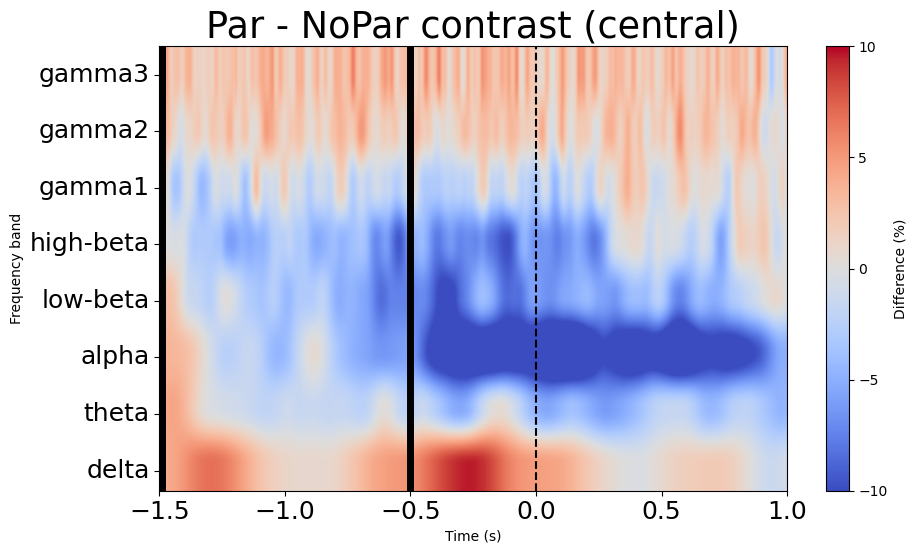

In [46]:
# create contrast map using percentage change
contrast = (par_final - nopar_final) / nopar_final * 100
# crop epochs between -1.5 and -0.5
epochs.crop(-2, 1.5)
plt.figure(figsize=(10, 6))
plt.imshow(np.nanmean(contrast, axis=0), aspect='auto', origin='lower', 
            extent=[epochs.times[0], epochs.times[-1],1, contrast.shape[0]])
# set frontsize of colorbar
plt.colorbar(label='Difference (%)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency band')
# set ticks y labels to delta (10), theta (20), alpha (30), low-beta (40), high-beta (50), gamma1 (60), gamma2 (70)
# the 7 ticks should be fistributed between 1 and 2 automatically
plt.yticks(np.arange(1.5, 12, 1.4), ['delta', 'theta', 'alpha', 'low-beta', 'high-beta', 'gamma1', 'gamma2', 'gamma3'])
# center the yticks labels
plt.gca().set_yticklabels(['delta', 'theta', 'alpha', 'low-beta', 'high-beta', 'gamma1', 'gamma2', 'gamma3'], va="center")
# set coolwarm colorbar
plt.set_cmap('coolwarm')
# center colorbar at zero
plt.clim(-10, 10)
# increase all font sizes
plt.rcParams.update({'font.size': 22})
# increase font size of y labels
plt.yticks(fontsize=18)
# increase font size of x labels
plt.xticks(fontsize=18)
# add vertical line at 0
plt.axvline(x=0, color='black', linestyle='--')

# add hashed zone between -1.5 and -0.5
#plt.axvspan(-1.5, -0.5, color='grey', alpha=0.2)
# add tick black line at -1.5
plt.axvline(x=-1.49, color='black', linestyle='-', linewidth=5)
plt.axvline(x=-0.5, color='black', linestyle='-', linewidth=5)


# xlim between -1.5 and 1.0
plt.xlim(-1.5, 1.0)
plt.title('Par - NoPar contrast (central)')
plt.tight_layout()
plt.savefig('C:/Users/Antoine/github/MEG_pareidolia/TF_map_par_nopar_central.png', dpi=300)
plt.show()

Using a threshold of 4.300950
stat_fun(H1): min=-0.000269 max=2.851790
Running initial clustering …
Found 0 clusters


C:\Users\Antoine\AppData\Local\Temp\ipykernel_18400\447532680.py:16: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_pv, h0 = permutation_cluster_test(


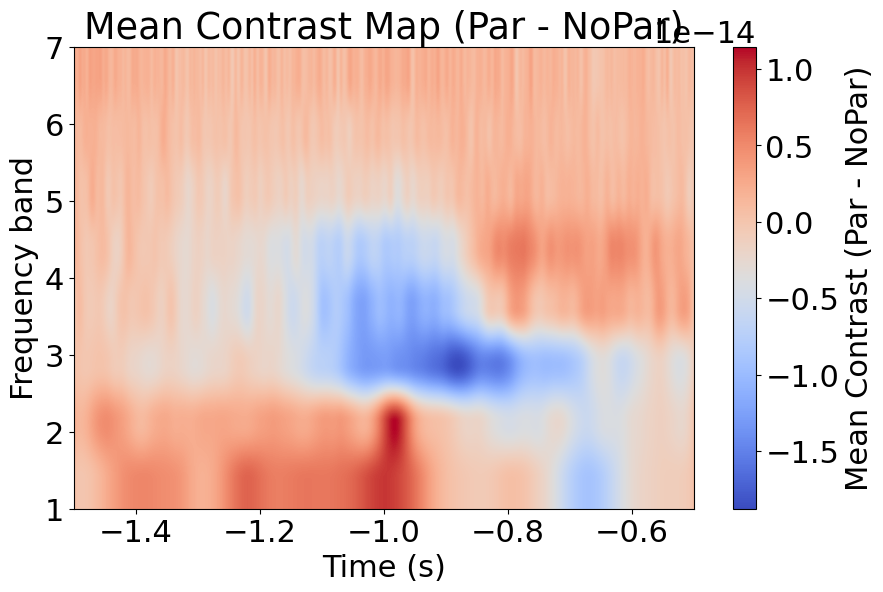

Significant clusters: []


In [66]:
from mne.stats import permutation_cluster_test
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'par_final' and 'nopar_final' are numpy arrays of shape (n_participants, n_bands, n_timepoints)

# Prepare data for MNE function
X = [par_final, nopar_final]

# Define an adjacency matrix (if needed)
# If your analysis doesn't require adjacency (e.g., if each band and timepoint is treated as independent),
# you can set adjacency to None or explore creating an adjacency matrix that reflects the relationships in your data.

# Run permutation cluster test
# The threshold can be None for automatic selection, or a specific value based on your hypothesis
t_obs, clusters, cluster_pv, h0 = permutation_cluster_test(
    X, threshold=None, n_permutations=1000, tail=1, adjacency=None, n_jobs=1
)

# Identify significant clusters
# Adjust the p-value threshold as necessary
significant_clusters = np.where(cluster_pv < 0.15)[0]

# Visualize the results
# Assuming a simple 2D structure for bands x timepoints
plt.figure(figsize=(10, 6))
mean_contrast = np.nanmean(par_final - nopar_final, axis=0)  # Mean contrast across participants
plt.imshow(mean_contrast, aspect='auto', origin='lower', extent=[-1.5, -0.5, 1, 7])
plt.colorbar(label='Mean Contrast (Par - NoPar)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency band')
plt.title('Mean Contrast Map (Par - NoPar)')
plt.show()

# Print significant clusters
print("Significant clusters:", significant_clusters)


In [83]:
def plot_time_frequency(data, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(np.nanmean(data, axis=0), aspect='auto', origin='lower', 
               extent=[epochs.times[0], epochs.times[-1], 1, data.shape[0]])
    plt.colorbar(label='Power')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency band')
    plt.title(title)
    plt.show()

(67, 7, 1201)

## Early vs Late

In [8]:
import mne
import numpy as np

subj_list = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']
run_list = ['1', '2', '3', '4', '5', '6']


all_hilbert_early = []
all_hilbert_late = []

for subj in subj_list:
    early_hilbert_ = []
    late_hilbert_ = []

    for run in run_list:
        try:
            epo_name, epo_path = get_pareidolia_bids(FOLDERPATH, subj, 'pareidolia', run, stage='epo_RT_wide', cond=None)
            epochs = mne.read_epochs(epo_path)
            epo_name, epo_path = get_pareidolia_bids(FOLDERPATH, subj, 'pareidolia', run, stage='epo_RT_early3s_real', cond=None)
            epochs_earlyVSlate = mne.read_epochs(epo_path)
            hilbert_data = get_hilbert_data(subj, run)

            # Modify here for early vs. late
            early_bool = epochs_earlyVSlate.metadata['earlyVSlate'] == 1
            late_bool = epochs_earlyVSlate.metadata['earlyVSlate'] == 2
            early_indices = [i for i, sel in enumerate(early_bool) if sel]
            late_indices = [i for i, sel in enumerate(late_bool) if sel]

            hilbert_early = hilbert_data[:, 0, early_indices, :, :]
            hilbert_late = hilbert_data[:, 0, late_indices, :, :]

            # Keep only selected regions
            hilbert_early = hilbert_early[:, :, MEG_atlas['OL'] + MEG_atlas['OR'] + MEG_atlas['OZ'], :]
            hilbert_late = hilbert_late[:, :, MEG_atlas['OL'] + MEG_atlas['OR'] + MEG_atlas['OZ'], :]

            # Average across channels
            hilbert_early = np.mean(hilbert_early, axis=2)
            hilbert_late = np.mean(hilbert_late, axis=2)
            print ('HILBERT_EARLY', hilbert_early.shape)
            # Concatenate or initialize
            if len(early_hilbert_) == 0:
                early_hilbert_ = hilbert_early
                late_hilbert_ = hilbert_late
            else:
                early_hilbert_ = np.concatenate((early_hilbert_, hilbert_early), axis=1)
                late_hilbert_ = np.concatenate((late_hilbert_, hilbert_late), axis=1)

        except (FileNotFoundError, KeyError):
            print(f'File not found for subj {subj} run {run}')
            continue

    # Convert to arrays and append
    early_hilbert_ = np.array(early_hilbert_)
    late_hilbert_ = np.array(late_hilbert_)
    all_hilbert_early.append(early_hilbert_)
    all_hilbert_late.append(late_hilbert_)

# Further processing and analysis would follow


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 2, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 4, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 8, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 1, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 9, 3601)
File not found for subj 00 run 6
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 16, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 13, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 12, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 6, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 14, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-01\ses-recording\meg\sub-01_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 20, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 2, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 2, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 2, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 0, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 10, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-02\ses-recording\meg\sub-02_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 14, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 19, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 24, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 16, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 17, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 24, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-03\ses-recording\meg\sub-03_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 22, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
45 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 0, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 3, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 3, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 0, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 1, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 1, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 28, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 29, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 31, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 26, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 26, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
48 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-05\ses-recording\meg\sub-05_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
49 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 19, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 9, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 3, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 6, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 0, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 2, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-06\ses-recording\meg\sub-06_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 4, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 14, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 8, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 10, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 8, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 12, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-07\ses-recording\meg\sub-07_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 11, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 5, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 10, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 9, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 10, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 5, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-08\ses-recording\meg\sub-08_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 8, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 20, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 28, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 30, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 35, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 37, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-09\ses-recording\meg\sub-09_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 39, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 8, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 10, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 21, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-4_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 14, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 13, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-10\ses-recording\meg\sub-10_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 10, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-1_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 3, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-2_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 0, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-3_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 6, 3601)
File not found for subj 11 run 4
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-4_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-5_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 7, 3601)
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:18: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_wide.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    1500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_10724\1507023511.py:20: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-11\ses-recording\meg\sub-11_ses-recording_task-pareidolia_run-6_epo_RT_early3s_real.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_earlyVSlate = mne.read_epochs(epo_path)


    Read 5 compensation matrices
    Found the data of interest:
        t =   -2500.00 ...    -500.00 ms
        5 CTF compensation matrices available
Adding metadata with 8 columns
52 matching events found
No baseline correction applied
0 projection items activated
HILBERT_EARLY (8, 3, 3601)


In [9]:
# all_hilbert_par_CL = all_hilbert_par['CL']
# all_hilbert_par_CR = all_hilbert_par['CR']
# all_hilbert_par_CZ = all_hilbert_par['CZ']

# all_hilbert_nopar_CL = all_hilbert_nopar['CL']
# all_hilbert_nopar_CR = all_hilbert_nopar['CR']
# all_hilbert_nopar_CZ = all_hilbert_nopar['CZ']

# list_hilbert_par = [all_hilbert_par_CL, all_hilbert_par_CR, all_hilbert_par_CZ]
# list_hilbert_nopar = [all_hilbert_nopar_CL, all_hilbert_nopar_CR, all_hilbert_nopar_CZ]


# parvar = all_hilbert_par_CL
# noparvar = all_hilbert_nopar_CL

def avg_tf(parvar, noparvar):
    for i in range(len(parvar)):
        # average across trials
        parvar[i] = np.mean(parvar[i], axis=1)
        noparvar[i] = np.mean(noparvar[i], axis=1)
        # convert complex to abs
        parvar[i] = np.abs(parvar[i])
        noparvar[i] = np.abs(noparvar[i])
    return parvar, noparvar

# par_final, nopar_final = avg_tf(parvar, noparvar)

for i in range(len(all_hilbert_early)):
    # average across trials
    all_hilbert_early[i] = np.mean(all_hilbert_early[i], axis=1)
    all_hilbert_late[i] = np.mean(all_hilbert_late[i], axis=1)
    # convert complex to abs
    all_hilbert_early[i] = np.abs(all_hilbert_early[i])
    all_hilbert_late[i] = np.abs(all_hilbert_late[i])

early_final = np.array(all_hilbert_early)
late_final = np.array(all_hilbert_late)



In [5]:
late_final.shape

NameError: name 'late_final' is not defined

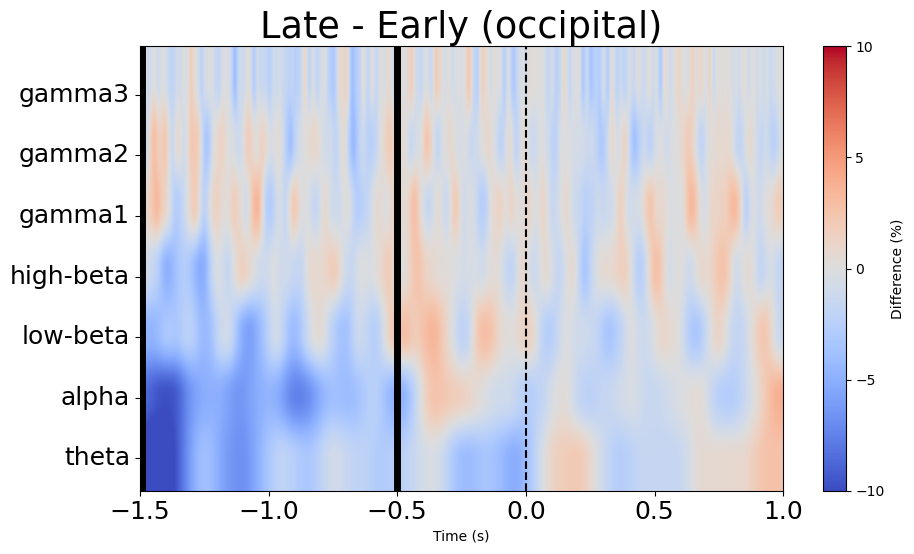

In [10]:
late_final = late_final[:, 1:, :]
early_final = early_final[:, 1:, :]
# create contrast map using percentage change
contrast = (late_final - early_final) / late_final * 100
# crop epochs between -1.5 and -0.5
epochs.crop(-2, 1.5)
plt.figure(figsize=(10, 6))
plt.imshow(np.nanmean(contrast, axis=0), aspect='auto', origin='lower', 
            extent=[epochs.times[0], epochs.times[-1],1, contrast.shape[0]])
# set frontsize of colorbar
plt.colorbar(label='Difference (%)')
plt.xlabel('Time (s)')
#plt.ylabel('Frequency band')
# set ticks y labels to delta (10), theta (20), alpha (30), low-beta (40), high-beta (50), gamma1 (60), gamma2 (70)
# the 7 ticks should be fistributed between 1 and 2 automatically
plt.yticks(np.arange(1.8, 12, 1.5), ['theta', 'alpha', 'low-beta', 'high-beta', 'gamma1', 'gamma2', 'gamma3'])
# center the yticks labels
plt.gca().set_yticklabels(['theta', 'alpha', 'low-beta', 'high-beta', 'gamma1', 'gamma2', 'gamma3'], va="center")
# set coolwarm colorbar
plt.set_cmap('coolwarm')
# center colorbar at zero
plt.clim(-10, 10)
# increase all font sizes
plt.rcParams.update({'font.size': 22})
# increase font size of y labels
plt.yticks(fontsize=18)
# increase font size of x labels
plt.xticks(fontsize=18)
# add vertical line at 0
plt.axvline(x=0, color='black', linestyle='--')

# add hashed zone between -1.5 and -0.5
#plt.axvspan(-1.5, -0.5, color='grey', alpha=0.2)
# add tick black line at -1.5
plt.axvline(x=-1.49, color='black', linestyle='-', linewidth=5)
plt.axvline(x=-0.5, color='black', linestyle='-', linewidth=5)


# xlim between -1.5 and 1.0
plt.xlim(-1.5, 1.0)
plt.title('Late - Early (occipital)')
plt.tight_layout()
plt.savefig('C:/Users/Antoine/github/MEG_pareidolia/TF_map_earlyVSlate_3s_occipital.png', dpi=300)
plt.show()

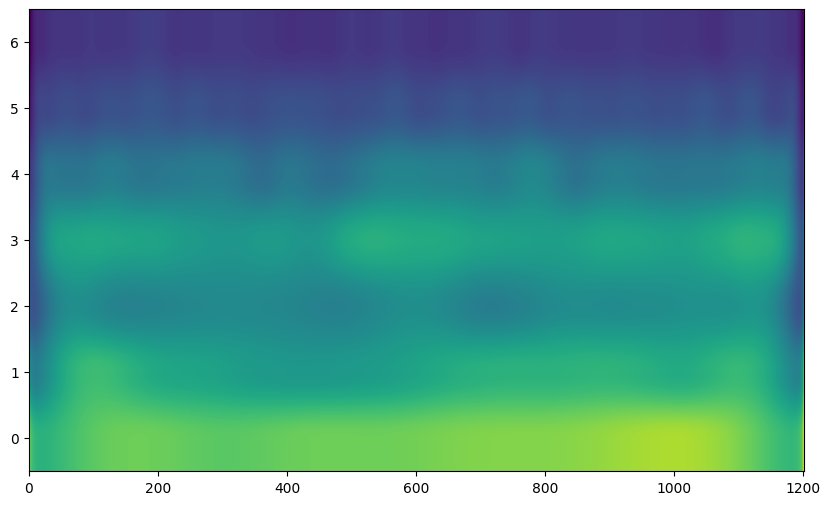

In [76]:
# plot image for par_all

plt.figure(figsize=(10, 6))
plt.imshow(np.nanmean(par_all, axis=0), aspect='auto', origin='lower')

In [8]:
hilbert_data.shape

(7, 2, 52, 270, 1201)